<style>
    /* Default styles for light mode */
    .title {
        font-family: 'Georgia', serif;
        text-align: center;
        margin-top: 40px;
    }

    .title h1 {
        font-weight: 700;
        font-size: 48px;
        color: #333333; /* Dark text for light mode */
        line-height: 1.2;
    }

    .title p {
        font-size: 18px;
        color: #666666; /* Medium grey for light mode */
        margin-top: 10px;
    }

    .title hr {
        border: none;
        border-top: 1px solid #BBBBBB; /* Light grey for light mode */
        width: 60%;
        margin: 20px auto;
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .title h1 {
            color: #F5F5F5; /* Light text for dark mode */
        }

        .title p {
            color: #BBBBBB; /* Lighter grey for dark mode */
        }

        .title hr {
            border-top: 1px solid #555555; /* Dark grey for dark mode */
        }
    }
</style>

<div class="title">
    <h1>Recurrent Neural Network</h1>
    <p>By: Trevor Pope and Micheal Callahan</p>
    <hr>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Problem Statement</h2>
    <p>
        This assignment accomplishes two goals. It demonstrates how neural networks can be used in forecasting and how they can be used in practical applications involving text (e.g., completing a search request on Google).
    </p>
    <p>
        Using a large set of texts for training, build an RNN that suggests the next word in a sentence (sequential learning). Consider the entire sentence when completing the sentence instead of words by themselves.
    </p>
    <p>
        Specifically our project is going to look at 506 different Donald Trump speeches. This is not meant to be political rather it is an examination if we have a large amount of text from one person: can we predict what they will say next?
    </p>
    <p>
        By examining the predictability of language in this context, we seek to understand how RNNs can be tailored to handle distinct, personalized text patterns.
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Algorithm</h2>
    <p>
        ...
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Data Initialization</h2>
    <p>
        This dataset contains over 500 Donald Trump Speeches from the years of 2015-2024. The dataset aims to capture a diverse range of topics and contexts, providing a rich source of text for training our Recurrent Neural Network (RNN).
    </p>
    <p>
        "The data is unbiased, strictly Donald Trump speech, and from a diverse range of times, topics and contexts" - W.S. Tang via the Kaggle website in references
    </p>
    <p>
        The file is already lowercased and has many fields from the json file but for this project we are only interested in the text from it. This is in the transcript field
    </p>
    <p>
        The histogram shows that most of these speeches are less than 5000 words. So most of the dataset is small speeches, but the mean count when the df column of transcript (the text) was described showed to be around 10,000 which shows that some large speeches are included as well to bring the mean up.
    </p>
    <p>
        A potential bias to address is these small speeches may be different types of speeches from Trump where he doesn't talk the exact same. This will have to be examined throughout the project development.
    </p>
</div>



In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import kagglehub
import os
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
import json


# Download latest version
path = kagglehub.dataset_download("tangtaidje/donald-trump-rev-com-speech-transcripts-dataset")

In [45]:
# in path make the // to / and add the file name
path = path.replace("\\", "/")

file_name = "Trump_Labeled_Combined_Rev_Speeches_Final_9-24-2024.json"

path = path + "/" + file_name

In [46]:
with open(path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

df.head()

,transcript,title,date,link,word_count,character_count,avg_word_len,stop_word_count,stop_word_rate,non_stopwords,lemmatized,polarity,subjectivity
0,thank you very much. please. thank you. the fi...,abraham-accords-signing-ceremony-transcript-se...,"Sep 15, 2020",https://www.rev.com/transcript-editor/shared/c...,955,4447,4.656545,437,0.457592,thank much please thank first lady honored wel...,thank much please thank first lady honored wel...,0.238266,0.458421
1,"yeah. around that time, yes. maybe a year late...",all-released-portions-of-trumps-10-19-22-depos...,"May 8, 2023",https://www.rev.com/transcript-editor/shared/y...,2977,11520,3.869667,1585,0.532415,yeah around time yes maybe year later thats ri...,yeah around time yes maybe year later thats ri...,0.077526,0.518494
2,thank you very much. appreciate it. thank you ...,amy-coney-barrett-swearing-in-ceremony-transcript,"Oct 26, 2020",https://www.rev.com/transcript-editor/shared/q...,981,4645,4.734964,452,0.460754,thank much appreciate thank much distinguished...,thank much appreciate thank much distinguished...,0.325494,0.526735
3,thank you. . nice to see you. thank you. thank...,cnn-donald-trump-town-hall-5-10-23-transcript,"May 11, 2023",https://www.rev.com/transcript-editor/shared/I...,8392,34149,4.069233,4510,0.537417,thank nice see thank thank thank fantastically...,thank nice see thank thank thank fantastically...,0.102392,0.539212
4,thank you very much everyone. thank you. progr...,coronavirus-task-force-briefing-transcript-mar...,"Mar 17, 2020",https://www.rev.com/transcript-editor/shared/d...,6519,27277,4.184231,3379,0.518331,thank much everyone thank progress made apprec...,thank much everyone thank progress made apprec...,0.186451,0.536127


In [47]:
print(df["transcript"][0])

thank you very much. please. thank you. the first lady and i are honored to welcome to the white house prime minister netanyahu of israel, and mrs. netanyahu. thank you so much. thank you, sara. and foreign minister abdullah bin zayed, united arab emirates, uae. thank you very much. and foreign minister abdullatif al zayani of bahrain. thank you. thank you very much. we’re here this afternoon to change the course of history. after decades of division and conflict, we mark the dawn of a new middle east. thanks to the great courage of the leaders of these three countries, we take a major stride toward a future in which people of all faiths and backgrounds live together in peace and prosperity. in a few moments, these visionary leaders will sign the first two peace deals between israel and the arab state in more than a quarter century. in israel’s entire history, there have previously been only two such agreements; now we have achieved two in a single month, and there are more to follow. 

C:\Users\callahan\AppData\Local\Temp\ipykernel_20972\908605931.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df["transcript"][0])


In [48]:
df["word_count"].describe()

count      506.000000
mean      6288.579051
std       4474.251659
min         62.000000
25%       2215.000000
50%       5512.000000
75%       9789.750000
max      19121.000000
Name: word_count, dtype: float64

(array([78., 65., 49., 52., 34., 41., 35., 40., 36., 27., 22., 16.,  4.,
         4.,  3.]),
 array([   62. ,  1332.6,  2603.2,  3873.8,  5144.4,  6415. ,  7685.6,
         8956.2, 10226.8, 11497.4, 12768. , 14038.6, 15309.2, 16579.8,
        17850.4, 19121. ]),
 <BarContainer object of 15 artists>)

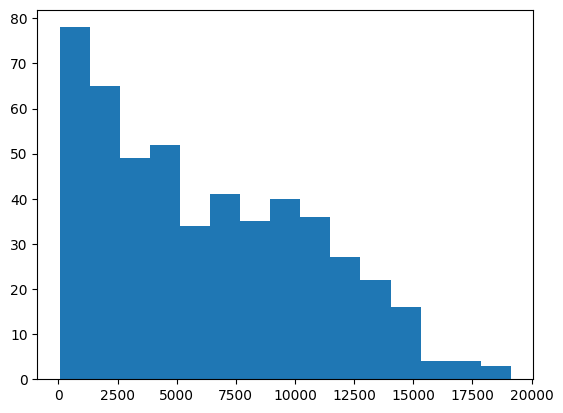

In [49]:
# make a histogram of the word count
plt.hist(df["word_count"], bins=15)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Data Preprocessing</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Remove Punctuation
        </li>
        <li>
            Split strings into lists of individual words
        </li>
        <li>
            Convert the words into integers
        </li>
    </ul>
    <p>

    </p>
</div>



In [50]:
# Join all the text together
text = " ".join(df["transcript"])

In [51]:
# filter out /n and /r (Don't know if it is in there but doesnt hurt)
df["transcript"] = df["transcript"].apply(lambda x: re.sub(r"\n|\r", " ", x))

# Filter out any punctuation
df["transcript"] = df["transcript"].apply(lambda x: re.sub(r"[^\w\s]", "", x))

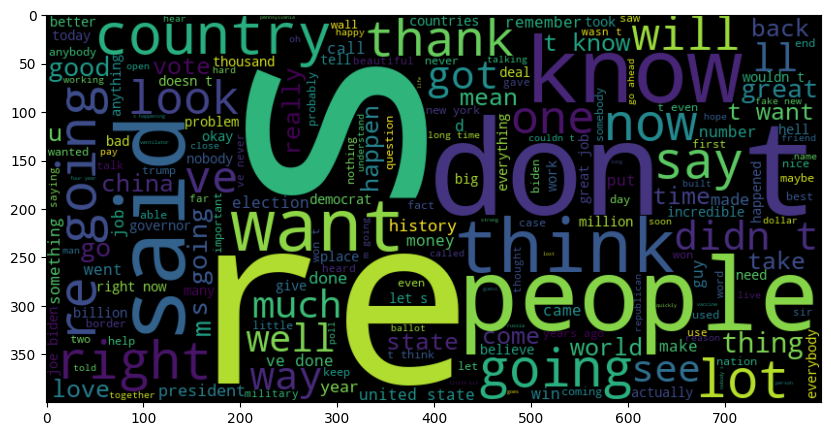

In [52]:
# Create the word cloud object
wordcloud = WordCloud(width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")


Make five word sequences

In [53]:
sequences = []
file_count = 0

# Loop through each text to create sequences of 5 words
for text in df["transcript"]:
    words = text.split()

    file_count += 1

    count = 0

    # Check if the count + 5 is less than the length of the words
    while count + 5 < len(words):
        try:
            sequence = " ".join(words[count:count + 5])

            sequences.append(sequence)
            count += 1      # we can also use count += 5 to get non-overlapping sequences
        except IndexError:
            break

# Create a dataframe of the sequences
df_sequences = pd.DataFrame(sequences, columns=["sequence"])
print(file_count)
len(df_sequences)


506


3179491

In [54]:
# Initialize the tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")    # oov_token is used for out of vocabulary words
tokenizer.fit_on_texts(df_sequences["sequence"])

df_sequences["sequence"] = tokenizer.texts_to_sequences(df_sequences["sequence"])
df_sequences.head()



,sequence
0,"[65, 8, 22, 74, 189]"
1,"[8, 22, 74, 189, 65]"
2,"[22, 74, 189, 65, 8]"
3,"[74, 189, 65, 8, 2]"
4,"[189, 65, 8, 2, 142]"


In [55]:
# split sequences into input and output
X = []
y = []

for sequence in df_sequences["sequence"]:
    if len(sequence) != 5:
        print(sequence)
        continue
    
    X.append(sequence[:-1])     # append all the words except the last one
    y.append(sequence[-1])      # append the last word

print(X[0])
print(y[0])


[30, 645, 1306, 1054]
[645, 1306, 1054, 3]
[1306, 1054, 3, 97]
[1054, 3, 97, 506]
[3, 97, 506, 4]
[65, 8, 22, 74]
189


In [56]:
y = np.array(y)
X = np.array(X)


<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Build the Model</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Set the number of words as a parameter.
        </li>
        <li>
            Select a subset of the data to be used as a training set.
        </li>
        <li>
            Decide on a training method, for example:
            Use words 1 through n words as features and the n+1 word as the label.
        </li>
    </ul>
    <p>
        Requirements of the Model:
    </p>
    <ul>
        <li>
            An Embedding, which maps each input word to a 100-dimensional vector. The embedding can use pretrained weights (more in a second), which we supply in the weights parameter; trainable can be set False if we don't want to update the embeddings.
        </li>
        <li>
            A Masking layer, to mask any words that do not have a pretrained embedding, which will be represented as all zeros. This layer should not be used when training the embeddings.
        </li>
        <li>
            The heart of the network: a layer of LSTM cells with dropout to prevent overfitting. Since we are only using one LSTM layer, it does not return the sequences; for using two or more layers, make sure to return sequences.
        </li>
        <li>
            A fully connected Dense layer with relu. This adds additional representational capacity to the network.
        </li>
        <li>
            A Dropout layer, to prevent overfitting to the training data.
        </li>
        <li>
            A Dense fully connected output layer, this produces a probability for every word in the vocab using softmax.
        </li>
        <li>
            Compile the model with the Adam optimizer.
        </li>
    </ul>
    <p>
        Requirements of Pretrained Embeddings:
    </p>
    <ul>
        <li>
            Load in the pretrained embeddings; choose embeddings from the GloVe algorithm, which has been trained on Wikipedia texts. Refer to "GloVe: Global Vectors for Word Representation," located in the topic Resources. Assign a 100-dimensional vector to each word in the vocab. If the word has no pretrained embedding, then this vector will be all zeros.
        </li>
        <li>
            Explore the embeddings using cosine similarity between two vectors.
        </li>
    </ul>
</div>



In [57]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Masking, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Bring in GloVe:

**Chat explained it well here:**
Suppose you’re training a model to predict the next word in a speech. With GloVe embeddings, the RNN can interpret that "freedom," "independence," and "liberty" have similar meanings based on their vector proximity. So, if your training data has limited occurrences of "liberty," but the model has learned from many instances of "freedom," it can still generalize well when predicting sentences that use either word, thanks to the semantic closeness learned through GloVe.

In [58]:
# initialize an empty dictionary for GloVe embeddings
embeddings_index = {}

# Load the GloVe embeddings
with open("glove.6B.100d.txt", encoding="utf-8") as file:
    for line in file:
        values = line.split()   # split the line by spaces
        word = values[0]        # get the word
        vector = np.array(values[1:], dtype="float32")    # get the vector representation of the word
        embeddings_index[word] = vector   # add the word and its vector to the dictionary

Get the embedding matrix for GloVe by getting our vocab size (num of unique words from tokenizer) and the embedding dimension which is just 100 as that is the model of GloVe we are using

In [59]:
# Get the vocabulary size: the number of unique words in the tokenizer
vocab_size = len(tokenizer.word_index) + 1      # we add 1 because the tokenizer is 1-indexed

# Get the embedding dimension
embedding_dim = 100

# Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

print(embedding_matrix.shape)

(23609, 100)


**Populate the embedding matrix:**

We are looking up in our embedding index dictionary each word and it's vector. With these vectors we will be able to identify close relationships with other vectors. Like the "liberty" and "freedom" example

In [60]:
# Loop through each word and its index from the tokenizer in data preprocessing
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)    # get the GloVe vector for the word

    # if the word is in the GloVe embeddings, then add it to the embedding matrix
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [61]:
# Make a 80/20 split with the 20 being the temporary set (we will make a 50/50 split on this set)
X_temp, X_train, y_temp, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

# Make a 50/50 split for the validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [62]:
# Model hyperparameters
embedding_dim = 100   # this is already defined from before but just so we know what it is easily
lstm_units = 128     # number of LSTM units. Number of neurons in the LSTM layer
dense_units = 64     # number of neurons in the dense layer
dropout_rate = 0.2   # dropout rate. Applied after the LSTM layer and the dense layer to prevent overfitting


model = Sequential()

# An Embedding, which maps each input word to a 100-dimensional vector. 
model.add(Embedding(input_dim = vocab_size,     # tells embedding layer how many unique words
                    output_dim = embedding_dim,   # the dimension
                    weights = [embedding_matrix],    # the GloVe embeddings
                    input_length = X_train.shape[1],    # each input sequence is of length 4. Get w/ shape
                    trainable = False))   # we do not want to train the embeddings

# A Masking layer, to mask any words that do not have a pretrained embedding, 
# which will be represented as all zeros. This layer should not be used when training the embeddings.
model.add(Masking(mask_value=0.0))
  
# The heart of the network: a layer of LSTM cells with dropout to prevent overfitting. 
# Since we are only using one LSTM layer, it does not return the sequences; 
# for using two or more layers, make sure to return sequences.
model.add(LSTM(units=lstm_units, return_sequences=False))

# A fully connected Dense layer with relu. This adds additional representational capacity to the network.
model.add(Dense(units=dense_units, activation="relu"))

# Dropout layer, to prevent overfitting to the training data. (I'm gonna hold off on this for now)
model.add(Dropout(rate=dropout_rate))

# A Dense fully connected output layer, this produces a probability for every word in the vocab using softmax.
model.add(Dense(units=vocab_size, activation="softmax"))

# Compile the model
model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

C:\Users\callahan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     2,360,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ masking_1 (Masking)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,360,900 (9.01 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,360,900 (9.01 MB)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Train the Model</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Model Checkpoint: saves the best model (as measured by validation loss) on disk for using best model.
        </li>
        <li>
            Early Stopping: halts training when validation loss is no longer decreasing.
        </li>
    </ul>
</div>



In [63]:
# Early stopping callback
early_stopping = EarlyStopping(monitor="val_accuracy", patience=2)

# Train the model
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=10, 
                    batch_size=32, 
                    callbacks=[early_stopping])

Epoch 1/10
19872/19872 ━━━━━━━━━━━━━━━━━━━━ 654s 33ms/step - accuracy: 0.0869 - loss: 6.1047 - val_accuracy: 0.1426 - val_loss: 5.3377
Epoch 2/10
19872/19872 ━━━━━━━━━━━━━━━━━━━━ 630s 32ms/step - accuracy: 0.1427 - loss: 5.2698 - val_accuracy: 0.1532 - val_loss: 5.2226
Epoch 3/10
19872/19872 ━━━━━━━━━━━━━━━━━━━━ 628s 32ms/step - accuracy: 0.1523 - loss: 5.1209 - val_accuracy: 0.1584 - val_loss: 5.1813
Epoch 4/10
19872/19872 ━━━━━━━━━━━━━━━━━━━━ 629s 32ms/step - accuracy: 0.1573 - loss: 5.0600 - val_accuracy: 0.1636 - val_loss: 5.1526
Epoch 5/10
19872/19872 ━━━━━━━━━━━━━━━━━━━━ 625s 31ms/step - accuracy: 0.1608 - loss: 5.0272 - val_accuracy: 0.1668 - val_loss: 5.1395
Epoch 6/10
19872/19872 ━━━━━━━━━━━━━━━━━━━━ 629s 32ms/step - accuracy: 0.1625 - loss: 5.0068 - val_accuracy: 0.1682 - val_loss: 5.1349
Epoch 7/10
19872/19872 ━━━━━━━━━━━━━━━━━━━━ 683s 32ms/step - accuracy: 0.1644 - loss: 4.9975 - val_accuracy: 0.1681 - val_loss: 5.1355
Epoch 8/10
19872/19872 ━━━━━━━━━━━━━━━━━━━━ 634s 32ms/s

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Test the Model</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Make predictions by passing in a starting sequence (i.e., an incomplete sentence) and complete it.
        </li>
    </ul>
</div>



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

NameError: name 'model' is not defined

In [ ]:
# make a sample prediction
sample = "Hi this is just"
sample = tokenizer.texts_to_sequences([sample])
sample = np.array(sample)
sample = sample.reshape(1, -1)  # reshape to 2D array

prediction = model.predict(sample)  # predict the next word
prediction = np.argmax(prediction)  # get the index of the word with the highest probability

# print the top 5 words with the highest probability
print("Top 5 words with the highest probability:")
top_5 = np.argsort(prediction)[::-1][:5]

print(top_5)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Analyze the Results</h2>
    <p>
        ...
    </p>
</div>



In [ ]:
# what index of labels were misclassified
misclassified = np.where(y_test != y_pred)

# get the classified labels
classified = np.where(y_test == y_pred)

# plot a histogram of the misclassified labels
plt.hist(y_test[misclassified], bins=10, alpha=0.5, label="Misclassified")

plt.show()

In [ ]:
# plot a histogram of the classified labels
plt.hist(y_test[classified], bins=10, alpha=0.5, label="Classified")

plt.show()

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Conclusion</h2>
    <p>
        ...
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>References</h2>
    <p>
        https://nlp.stanford.edu/projects/glove/
    </p>
    <p>
        https://www.kaggle.com/datasets/tangtaidje/donald-trump-rev-com-speech-transcripts-dataset
    </p>
</div>

